In [ ]:
import pandas as pd

data = pd.read_csv('/content/amazon_alexa.tsv',sep = '\t')
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
data.shape

(3150, 5)

In [ ]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [ ]:
data.variation.unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

<Axes: xlabel='variation', ylabel='count'>

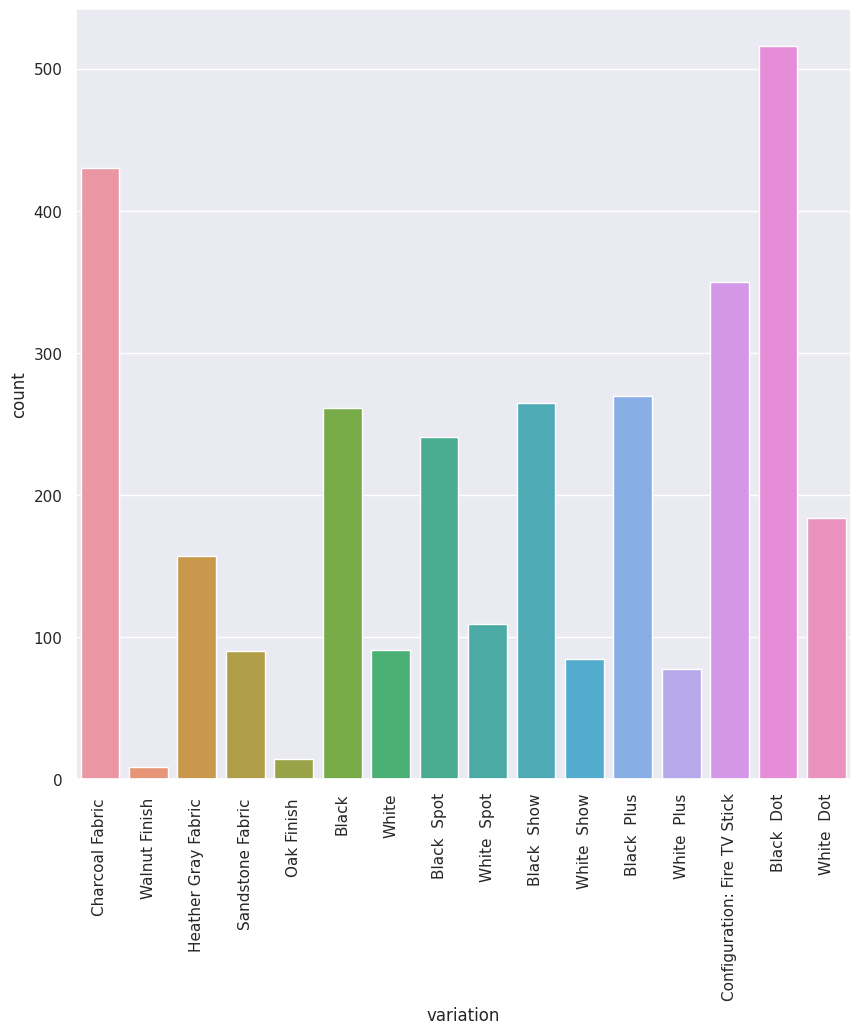

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.xticks(rotation=90)
sns.countplot(x='variation',data=data)

Text(0.5, 1.0, 'Pie chart of the Variation')

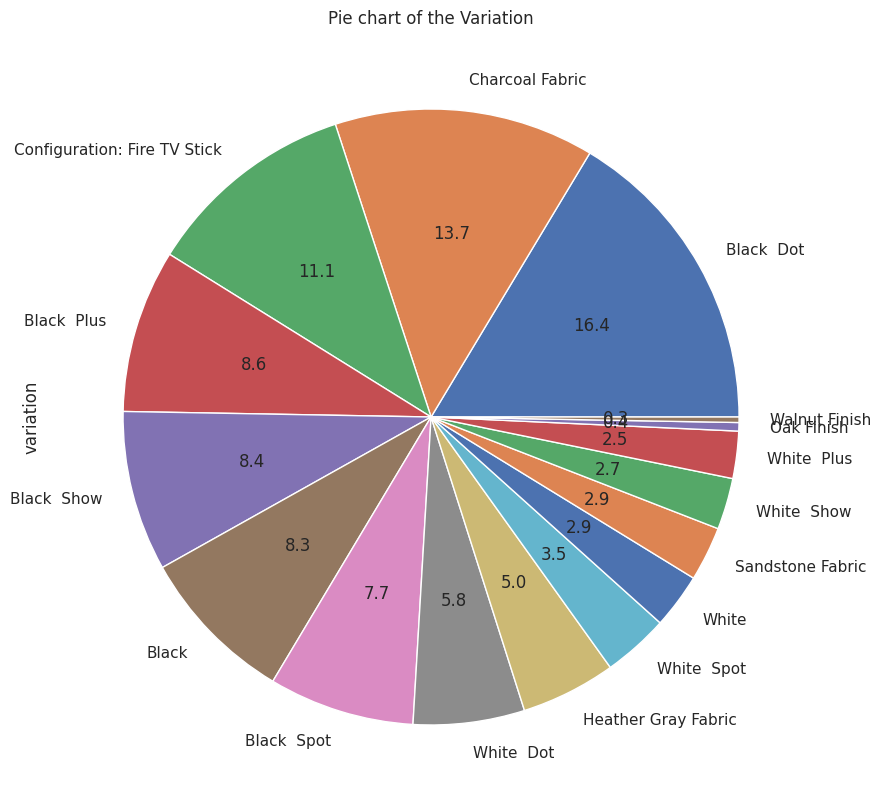

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
var = data['variation'].value_counts()
var.plot(kind='pie', autopct='%1.1f')
plt.title('Pie chart of the Variation')

In [ ]:
data = data.drop(['rating','date','feedback'],axis=1)

In [ ]:
import re
import string
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
from nltk.tokenize import word_tokenize

def clean_data(x):
  x = x.lower()
  x = re.sub('\[.*?\]', '', x)
  x = re.sub('[%s]' % re.escape(string.punctuation),'',x)
  x = re.sub('\w*\d\w*', '', x)
  x = re.sub(r"[-()\"#/@;:<>~|.?,]","",x)
  x = re.sub('\n', '', x)
  x = re.sub(r'[^\x00-\x7F]+', '', x)
  tokens = word_tokenize(x)
  words = [i for i in tokens if i not in stop_words]
  return " ".join(words)

cleaned_data = lambda a : clean_data(a)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data['cleaned_verified_reviews'] = pd.DataFrame(data['verified_reviews'].apply(cleaned_data))

In [ ]:
data = data.drop('verified_reviews',axis=1)
data.head()

,variation,cleaned_verified_reviews
0,Charcoal Fabric,love echo
1,Charcoal Fabric,loved
2,Walnut Finish,sometimes playing game answer question correct...
3,Charcoal Fabric,lot fun thing yr old learns dinosaurs control ...
4,Charcoal Fabric,music


In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.model_selection import train_test_split

x = data['cleaned_verified_reviews']
y = data['variation']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)


In [ ]:
import nltk
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

CV = CountVectorizer()
LR = LogisticRegression()

model = Pipeline([('Vectorizer',CV),('Classifier',LR)])
model.fit(x_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Classifier', LogisticRegression())])

In [ ]:
print(model.score(x_test, y_test)*100)
print(model.score(x_train, y_train)*100)

48.57142857142857
81.26984126984127


In [ ]:
pred = model.predict(x_test)

p1=model.predict(x_train)
accuracy_score(y_train,p1)

0.8126984126984127

In [ ]:
print("Accuracy :",accuracy_score(pred,y_test))
print("Precision :",precision_score(pred,y_test,average='weighted'))
print("Recall :",recall_score(pred,y_test,average="weighted"))

Accuracy : 0.4857142857142857
Precision : 0.5843212230052207
Recall : 0.4857142857142857


In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

model1 = Pipeline([('Vectorizer',CV),('Classifier',svc)])
model1.fit(x_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Classifier', SVC(kernel='linear'))])

In [ ]:
print(model1.score(x_test, y_test)*100)
print(model1.score(x_train, y_train)*100)

46.98412698412698
85.63492063492063


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()

model2 = Pipeline([('Vectorizer',CV),('Classifier',DTC)])
model2.fit(x_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Classifier', DecisionTreeClassifier())])

In [ ]:
print(model2.score(x_test, y_test)*100)
print(model2.score(x_train, y_train)*100)

48.73015873015873
91.9047619047619


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

model3 = Pipeline([('Vectorizer',CV),('Classifier',RFC)])
model3.fit(x_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Classifier', RandomForestClassifier())])

In [ ]:
print(model3.score(x_test, y_test)*100)
print(model3.score(x_train, y_train)*100)

52.85714285714286
91.9047619047619


In [ ]:
pred = model3.predict(x_test)

p1=model3.predict(x_train)
accuracy_score(y_train,p1)

0.919047619047619

In [ ]:
print("Accuracy :",accuracy_score(pred,y_test))
print("Precision :",precision_score(pred,y_test,average='weighted'))
print("Recall :",recall_score(pred,y_test,average="weighted"))

Accuracy : 0.5285714285714286
Precision : 0.6178423608068216
Recall : 0.5285714285714286


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import BernoulliNB

BNB =BernoulliNB()

model4 = Pipeline([('Vectorizer',CV),('Classifier',BNB)])
model4.fit(x_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Classifier', BernoulliNB())])

In [ ]:
print(model4.score(x_test, y_test)*100)
print(model4.score(x_train, y_train)*100)

32.06349206349206
40.27777777777778


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ABC = AdaBoostClassifier()

model5 = Pipeline([('Vectorizer',CV),('Classifier',ABC)])
model5.fit(x_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Classifier', AdaBoostClassifier())])

In [ ]:
print(model5.score(x_test, y_test)*100)
print(model5.score(x_train, y_train)*100)

17.936507936507937
18.21428571428571


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()

model6 = Pipeline([('Vectorizer',CV),('Classifier',GBC)])
model6.fit(x_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Classifier', GradientBoostingClassifier())])

In [ ]:
print(model6.score(x_test, y_test)*100)
print(model6.score(x_train, y_train)*100)

41.58730158730159
72.26190476190476


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier()
model7 = Pipeline([('Vectorizer',CV),('Classifier',KNC)])
model7.fit(x_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Classifier', KNeighborsClassifier())])

In [ ]:
print(model7.score(x_test, y_test)*100)
print(model7.score(x_train, y_train)*100)

24.126984126984127
47.06349206349206


In [ ]:
from sklearn.ensemble import BaggingClassifier

BC = BaggingClassifier()

model8 = Pipeline([('Vectorizer',CV),('Classifier',BC)])
model8.fit(x_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Classifier', BaggingClassifier())])

In [ ]:
print(model8.score(x_test, y_test)*100)
print(model8.score(x_train, y_train)*100)

50.0
90.23809523809524


In [ ]:
pred = model8.predict(x_test)

p1=model8.predict(x_train)
accuracy_score(y_train,p1)

0.9023809523809524

In [ ]:
print("Accuracy :",accuracy_score(pred,y_test))
print("Precision :",precision_score(pred,y_test,average='weighted'))
print("Recall :",recall_score(pred,y_test,average="weighted"))

Accuracy : 0.5
Precision : 0.5927268339285771
Recall : 0.5


In [ ]:
data['cleaned_verified_reviews'].unique()

array(['love echo', 'loved',
       'sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home',
       ...,
       'complaint sound quality isnt great mostly use commands though another dot hooked stereo system play music couple friends dot dont mind audio quality youre bothered kind thing id go full size echo make sure hook larger speakers',
       'nice little unit issues',
       'echo dot easy set use helps provide music etc small spaces looking'],
      dtype=object)

In [ ]:
for i in [model3]:
  example=['love echo', 'Music','sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home',
           'love things running entire home tv lights ther']
  result = i.predict(example)
  print(result)

['Charcoal Fabric ' 'Charcoal Fabric ' 'Walnut Finish '
 'Configuration: Fire TV Stick']


In [ ]:
data

,variation,cleaned_verified_reviews
0,Charcoal Fabric,love echo
1,Charcoal Fabric,loved
2,Walnut Finish,sometimes playing game answer question correct...
3,Charcoal Fabric,lot fun thing yr old learns dinosaurs control ...
4,Charcoal Fabric,music
...,...,...
3145,Black Dot,perfect kids adults everyone
3146,Black Dot,listening music searching locations checking t...
3147,Black Dot,love things running entire home tv lights ther...
3148,White Dot,complaint sound quality isnt great mostly use ...


In [ ]:
for i in [model5]:
  example=['loved']
  result = i.predict(example)
  print(result)

['Black  Dot']


In [ ]:
for i in [model3]:
  example=['echo dot easy set use helps provide music etc small spaces looking','ice little unit issues']
  result = i.predict(example)
  print(result)

['Black  Dot' 'Black  Dot']
